# ASSIGNMENT PROJECT | GRUPPO 2 - POLIMI : 

## Heart Failure Prediction Dataset - ANALYSIS 🩸

**Dataset Link and Description** `Heart Failure Prediction Dataset` [here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) 👈

In [63]:
#import Python Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv("heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print('Dataset size:', df.shape)

Dataset size: (918, 12)


## 1.  `EDA (Exploratory Data Analysis)`

In [4]:
#Check for duplicates:

duplicate_count = len(df)-len(df.drop_duplicates()) # Original data length (n. rows) - data length without duplicates

duplicate_count # 0 duplicate rows, OK!

0

In [5]:
#Check for % Missing Values:

df.isnull().sum().sort_values(ascending=False)/len(df) # 0 missing values (Nan), OK!

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [6]:
#Target (y) balance:

df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [7]:
#Main Statistics:

df.describe() 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
#Column data types:

df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

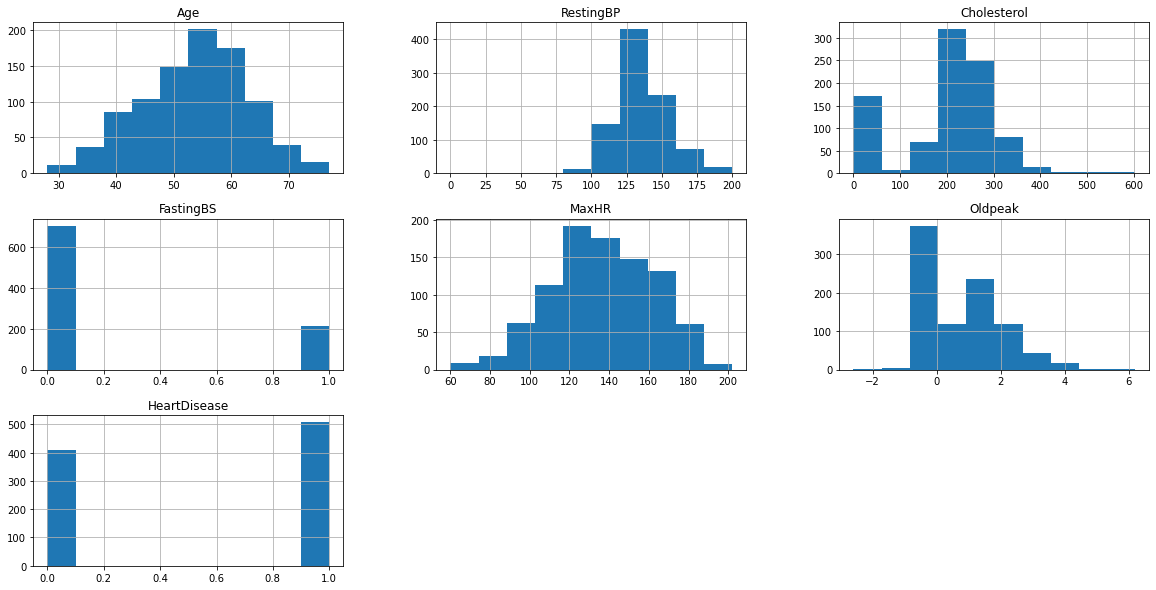

In [9]:
#Data Visualization: Distribution of each feature: (Histogram)

df.hist(figsize=(20,10))

plt.show() 

# 2. `Scaling Data`

In [10]:
# We'll use a Standard scaling technique to scale our numerical features:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #instanciate Standardscaler()

df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] =  scaler.fit_transform(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]) 

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,0,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,0,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,0,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,0,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,0,Normal,-0.581981,N,-0.832432,Up,0


# 3. `Encoding Categorical Features`

In [12]:
# 'Let's check whether our categorical features are binary or multicategorical:

In [13]:
df.Sex.unique() 

array(['M', 'F'], dtype=object)

In [14]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [15]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [16]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [17]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

### Binary Encoding:

In [18]:
#Sex column is binary, we'll just replace values with 0 and 1:

df['Sex'].replace("M", 0, inplace=True) 
df['Sex'].replace("F", 1, inplace=True) 

In [19]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0,ATA,0.410909,0.825070,0,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,1,NAP,1.491752,-0.171961,0,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,0,ATA,-0.129513,0.770188,0,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,1,ASY,0.302825,0.139040,0,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,0,NAP,0.951331,-0.034755,0,Normal,-0.581981,N,-0.832432,Up,0


In [20]:
#ExerciseAngina is binary as well:

df['ExerciseAngina'].replace("N", 0, inplace=True) 
df['ExerciseAngina'].replace("Y", 1, inplace=True) 

In [21]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0,ATA,0.410909,0.825070,0,Normal,1.382928,0,-0.832432,Up,0
1,-0.478484,1,NAP,1.491752,-0.171961,0,Normal,0.754157,0,0.105664,Flat,1
2,-1.751359,0,ATA,-0.129513,0.770188,0,ST,-1.525138,0,-0.832432,Up,0
3,-0.584556,1,ASY,0.302825,0.139040,0,Normal,-1.132156,1,0.574711,Flat,1
4,0.051881,0,NAP,0.951331,-0.034755,0,Normal,-0.581981,0,-0.832432,Up,0


### One-Hot Encoding:

In [22]:
# 'ChestPainType' is multicategorical so we'll use the One-Hot Encoding technique:

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder, "sparse" -> Will return sparse matrix if set True else will return an array

# Put encoded columns back in dataframe (remember: ndarray.T, The transposed array)

df['ATA'],df['NAP'],df['ASY'],df['TA']  = ohe.fit_transform(df[['ChestPainType']]).T 

df.drop(columns=['ChestPainType'], inplace = True) # Drop original column


In [23]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,ASY,TA
0,-1.433140,0,0.410909,0.825070,0,Normal,1.382928,0,-0.832432,Up,0,0.0,1.0,0.0,0.0
1,-0.478484,1,1.491752,-0.171961,0,Normal,0.754157,0,0.105664,Flat,1,0.0,0.0,1.0,0.0
2,-1.751359,0,-0.129513,0.770188,0,ST,-1.525138,0,-0.832432,Up,0,0.0,1.0,0.0,0.0
3,-0.584556,1,0.302825,0.139040,0,Normal,-1.132156,1,0.574711,Flat,1,1.0,0.0,0.0,0.0
4,0.051881,0,0.951331,-0.034755,0,Normal,-0.581981,0,-0.832432,Up,0,0.0,0.0,1.0,0.0


In [24]:
# 'RestingECG' column is categorical as well:

ohe2 = OneHotEncoder(sparse=False)


df['Normal'], df['ST'], df['LVH']= ohe2.fit_transform(df[['RestingECG']]).T 

df.drop(columns=['RestingECG'], inplace = True)


In [25]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,ASY,TA,Normal,ST,LVH
0,-1.433140,0,0.410909,0.825070,0,1.382928,0,-0.832432,Up,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.478484,1,1.491752,-0.171961,0,0.754157,0,0.105664,Flat,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.751359,0,-0.129513,0.770188,0,-1.525138,0,-0.832432,Up,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.584556,1,0.302825,0.139040,0,-1.132156,1,0.574711,Flat,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.051881,0,0.951331,-0.034755,0,-0.581981,0,-0.832432,Up,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [26]:
# 'ST_Slope' is also multicategorical:

ohe3 = OneHotEncoder(sparse=False) 

df['Up'], df['Flat'], df['Down']= ohe3.fit_transform(df[['ST_Slope']]).T 

df.drop(columns=['ST_Slope'], inplace = True) 


In [27]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ATA,NAP,ASY,TA,Normal,ST,LVH,Up,Flat,Down
0,-1.433140,0,0.410909,0.825070,0,1.382928,0,-0.832432,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.478484,1,1.491752,-0.171961,0,0.754157,0,0.105664,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.751359,0,-0.129513,0.770188,0,-1.525138,0,-0.832432,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.584556,1,0.302825,0.139040,0,-1.132156,1,0.574711,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.051881,0,0.951331,-0.034755,0,-0.581981,0,-0.832432,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


##  4. `Multicollinearity Test:`

### Correlation Matrix (Heatmap of the Pearson Correlation between the dataset columns):

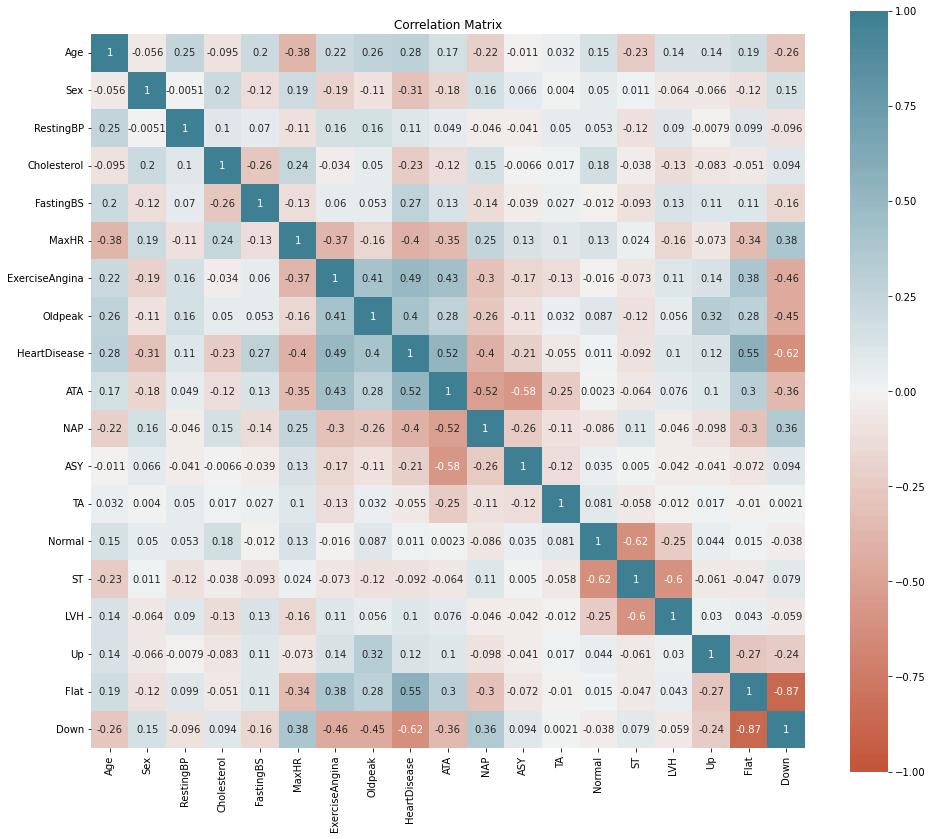

In [28]:
corr = df.corr() # Pearson Correlation

plt.figure(figsize=(16, 14))

# Heatmap

sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

plt.title('Correlation Matrix')

plt.show()

In [29]:
# Visualize the correlation between column pairs in a dataframe:

corr_df = corr.stack().reset_index()  #stack()

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

In [30]:
# ascending order

corr_df.sort_values(by="correlation", ascending= True, inplace=True) 


corr_df.head(5) #Down and Flat are highly correlated ("Dummy Variable Trap" deriving after One Hot Encoding technique)

,feature_1,feature_2,correlation
359,Down,Flat,-0.870951
341,Flat,Down,-0.870951
261,Normal,ST,-0.623227
279,ST,Normal,-0.623227
170,HeartDisease,Down,-0.622164


In [31]:
#descending order

corr_df.sort_values(by="correlation", ascending= False, inplace=True) 

corr_df.head(5) #no presence of very high correlations

,feature_1,feature_2,correlation
331,Flat,HeartDisease,0.554134
169,HeartDisease,Flat,0.554134
179,ATA,HeartDisease,0.516716
161,HeartDisease,ATA,0.516716
158,HeartDisease,ExerciseAngina,0.494282


# 5. `Models`

In [32]:
#Let's split our dataset into X (input) and y (target):

X= df.drop(columns= 'HeartDisease')
y= df['HeartDisease']

In [33]:
# Now we split our dataset into X_train, y_train, X_test, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

#  🔮 Cross-validation: 

## 1. Logistic Regression: 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression(max_iter=1000)  #instanciate model

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.8527353081700909
Recall:  0.8734901960784315
Precision:  0.8670751714505263


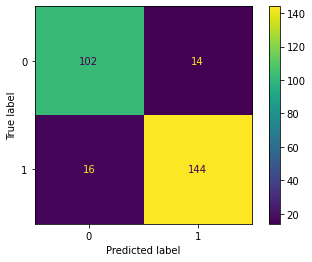

In [35]:
# Plot confusion matrix by passing trained model and test data

from sklearn.metrics import plot_confusion_matrix

model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test)

## Learning Curves - Logistic Regression

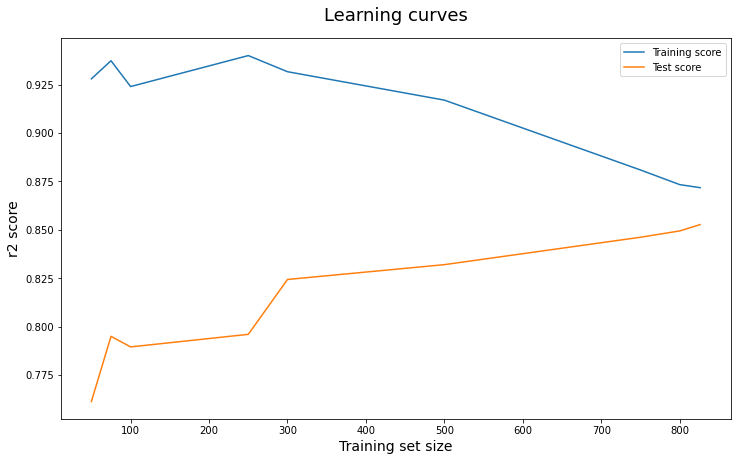

In [36]:
from sklearn.model_selection import learning_curve

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=1000),
                                                              X = X, 
                                                              y = y, 
                                                              train_sizes = [50,75,100,250,300,500,750, 800, 826], 
                                                              cv = 10)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(12,7))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend(); #Good fitting, OK!

## `Feature Importance - Feature Permutation`

In [37]:
from sklearn.inspection import permutation_importance

#Let's check the importance of every single variable

model = LogisticRegression(max_iter=1000).fit(X_train, y_train) # Fit model

permutation_score = permutation_importance(model, X_test, y_test, n_repeats=5) # Perform Permutation

importance_df= pd.DataFrame({'Feature': X.columns, 'Score_Decrease': permutation_score.importances_mean}) #df

importance_df= importance_df[importance_df['Score_Decrease']< 0.01] #let's only keep values close to 0 

importance_df

,Feature,Score_Decrease
0,Age,0.005797
2,RestingBP,0.002899
4,FastingBS,0.004348
5,MaxHR,0.005072
9,NAP,0.006522
11,TA,-0.006522
12,Normal,0.001449
13,ST,0.005072
14,LVH,-0.000725
15,Up,0.002174


##  Reduce complexity model ✂️

👇 Drop the weak features and cross-validate a new model. You should aim to maintain a score close to the previous one. Save the score under variable name simplified_model_score.

In [38]:
X = X.drop(columns=['Age','RestingBP','NAP','MaxHR','ASY','TA','Normal','ST','LVH','Up',]) # Drop weak features

In [39]:
X.shape

(918, 8)

In [40]:
# Re - Train test split -> Re - split data into train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=0)

In [41]:
#Let's evaluate a Logistic Regression model again after Feature Permutation: (Most of the models will achieve better scores)

model = LogisticRegression(max_iter=1000)  

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.8516483516483516
Recall:  0.8734901960784315
Precision:  0.8644105615167218


## 2. KNN Classifier:

In [42]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.8287625418060202
Recall:  0.8419607843137256
Precision:  0.8497352971992962


In [43]:
model.get_params().keys() #lets's check the model parameters for GridSearch()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

## 🎯 Tuning Hyperparameters - GridSearchCV - KNN Classifier

In [44]:
# GridSearch the KNN Classifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_grid =  {'n_neighbors': [3,5,7,9,11,13,15,19,25,27,29,31,33,35,39,41,45]}

search_knn = GridSearchCV(model, param_grid=param_grid, 
                              cv=3, n_jobs=-1, verbose=2, scoring='recall')

search_knn.fit(X, y)

print('Best params:', search_knn.best_params_)

print('Best Recall:', search_knn.best_score_)  

Fitting 3 folds for each of 17 candidates, totalling 51 fits
Best params: {'n_neighbors': 31}
Best Recall: 0.9096414897319874


In [45]:
model = search_knn.best_estimator_ # Best model -> k= 29

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.8658146201624461
Recall:  0.9128627450980391
Precision:  0.8581628796189096


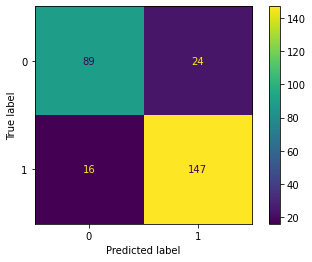

In [46]:
#Confusion Matrix

model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test)

## 3. Support Vector Classifier:

In [47]:
from sklearn.svm import SVC

model = SVC()

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.8636645962732918
Recall:  0.9050196078431372
Precision:  0.8619055425768849


## 🎯 Tuning Hyperparameters - GridSearchCV - Super Vector Classifier

In [48]:
param_grid =  param_grid = {'C':[1,10,100],'gamma':[1,0.1,0.01], 'kernel':['poly', 'rbf']}

search_svc = GridSearchCV(model, param_grid=param_grid, 
                              cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

search_svc.fit(X, y)

print('Best params:', search_svc.best_params_)

print('Best Accuracy:', search_svc.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy: 0.8507625272331154


In [49]:
model = search_svc.best_estimator_ # Best SVC model 

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.8636526516961298
Recall:  0.8951764705882352
Precision:  0.8644921739520697


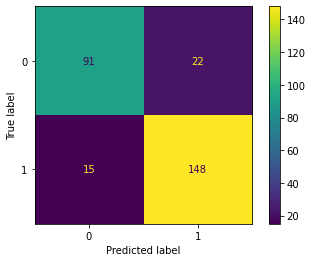

In [50]:
#SVC Confusion Matrix

model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test)

## 4. Gaussian Naive Bayes Classifier:

In [51]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.8647037744863832
Recall:  0.8951372549019607
Precision:  0.8669419051532422


## 5. GradientBoosting Classifier:

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.8582298136645962
Recall:  0.8852941176470589
Precision:  0.8661445415927682


## 6. Deep Learning - Classification

In [53]:
''' Tensorflow Keras'''
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [54]:
#Split train data into Train and Val in order to create the validation set:

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.7)

In [55]:
#Let's use recall and precision as metrics:

metrics = [
    keras.metrics.Recall(),
    keras.metrics.Precision()
]

In [56]:
def init_model(): #create model
  
    model = models.Sequential()
    
    model.add(layers.Dense(32, input_shape=(X.shape[1],), activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))

    # Model compilation
    
    optimizer = Adam(lr=0.001)

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=metrics)
    
    return model

In [57]:
model = init_model()

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable pa

In [59]:
#Let's use the EarlyStopping: 

es = EarlyStopping(
    patience=30,
    monitor='val_recall', 
    restore_best_weights=True)

#fit model

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=16, 
                    callbacks=[es], shuffle=True)

Epoch 1/100
29/29 [==============================] - 8s 81ms/step - loss: 0.6726 - recall: 0.7966 - precision: 0.5356 - val_loss: 0.6288 - val_recall: 0.8991 - val_precision: 0.7368
Epoch 2/100
29/29 [==============================] - 0s 16ms/step - loss: 0.6004 - recall: 0.8559 - precision: 0.6495 - val_loss: 0.5476 - val_recall: 0.9633 - val_precision: 0.7836
Epoch 3/100
29/29 [==============================] - 0s 11ms/step - loss: 0.5516 - recall: 0.8771 - precision: 0.7340 - val_loss: 0.4849 - val_recall: 0.9541 - val_precision: 0.8189
Epoch 4/100
29/29 [==============================] - 0s 11ms/step - loss: 0.5151 - recall: 0.8305 - precision: 0.7656 - val_loss: 0.4255 - val_recall: 0.9541 - val_precision: 0.8254
Epoch 5/100
29/29 [==============================] - 0s 12ms/step - loss: 0.4507 - recall: 0.8729 - precision: 0.8016 - val_loss: 0.3833 - val_recall: 0.9541 - val_precision: 0.8667
Epoch 6/100
29/29 [==============================] - 0s 14ms/step - loss: 0.4372 - recall:

In [60]:
def plot_loss_precision_recall_curve(history): #plot curves (loss, recall and precision)
    
    fig, ax =plt.subplots(1,3,figsize=(20,5))
    
    # --- LOSS
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(['Train', 'Val'], loc='upper right')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- RECALL

    ax[1].plot(history.history['recall'])
    ax[1].plot(history.history['val_recall'])
    ax[1].set_title('Model recall', fontsize = 18)
    ax[1].set_xlabel('Epoch', fontsize = 14)
    ax[1].set_ylabel('Recall', fontsize = 14)
    ax[1].legend(['Train', 'Val'], loc='lower right') 
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    
    # --- PRECISION
    
    
    ax[2].plot(history.history['precision'])
    ax[2].plot(history.history['val_precision'])
    ax[2].set_title('Model precision', fontsize = 18)
    ax[2].set_xlabel('Epoch', fontsize = 14)
    ax[2].set_ylabel('Precision', fontsize = 14)
    ax[2].legend(['Train', 'Val'], loc='lower right')  
    ax[2].grid(axis="x",linewidth=0.5)
    ax[2].grid(axis="y",linewidth=0.5)    
    
    
    plt.show()

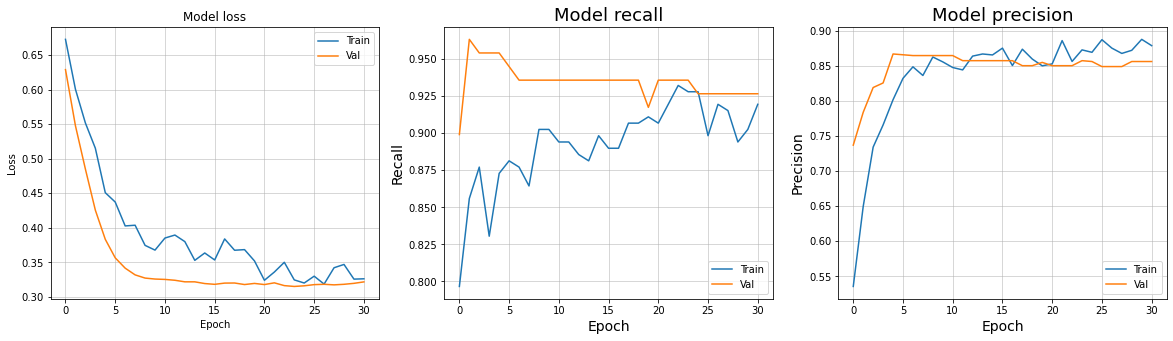

In [61]:
plot_loss_precision_recall_curve(history)

In [62]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True) #model evaluation

{'loss': 0.6192091703414917, 'recall': 0.9386503100395203, 'precision': 0.75}